In [3]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [5]:
%matplotlib inline

In [6]:
#changed the variable to df for easier readings
df = pd.read_csv("Kenya2012_2022exportsHS2-6.csv")

In [8]:
df['Product each industry'] = df.groupby('Section')['HS6'].transform('count')

In [10]:
df

,HS2,HS2 ID,HS4,HS4 ID,HS6,HS6 ID,Section,Section ID,Trade Value,Year,Product each industry
0,Live animals,101,Horses,10101,Pure-bred Breeding Horses,1010111,Animal Products,1,3846.0,2012,1425
1,Live animals,101,Horses,10101,Non-breeding Horses,1010119,Animal Products,1,13300.0,2012,1425
2,Live animals,101,Horses,10101,"Live Donkeys, Mules, and Crossbreeds",1010120,Animal Products,1,9355.0,2012,1425
3,Live animals,101,Bovine,10102,Pure-bred Breeding Cattle,1010210,Animal Products,1,56766.0,2012,1425
4,Live animals,101,Bovine,10102,Non-breeding Cattle,1010290,Animal Products,1,2624789.0,2012,1425
...,...,...,...,...,...,...,...,...,...,...,...
40159,Art & antiques,2197,Prints,219702,"Original engravings, prints and lithographs",21970200,Arts and Antiques,21,1849.0,2022,77
40160,Art & antiques,2197,Sculptures,219703,"Original sculptures and statuary, in any material",21970300,Arts and Antiques,21,638981.0,2022,77
40161,Art & antiques,2197,Revenue Stamps,219704,"Used postage and revenue stamps, first day cov...",21970400,Arts and Antiques,21,2507.0,2022,77
40162,Art & antiques,2197,Collector's Items,219705,Collections and collectors pieces,21970500,Arts and Antiques,21,391474.0,2022,77


# 2. Data Cleaning

In [13]:
df.columns

Index(['HS2', 'HS2 ID', 'HS4', 'HS4 ID', 'HS6', 'HS6 ID', 'Section',
       'Section ID', 'Trade Value', 'Year', 'Product each industry'],
      dtype='object')

In [15]:
df.head(10)

,HS2,HS2 ID,HS4,HS4 ID,HS6,HS6 ID,Section,Section ID,Trade Value,Year,Product each industry
0,Live animals,101,Horses,10101,Pure-bred Breeding Horses,1010111,Animal Products,1,3846.0,2012,1425
1,Live animals,101,Horses,10101,Non-breeding Horses,1010119,Animal Products,1,13300.0,2012,1425
2,Live animals,101,Horses,10101,"Live Donkeys, Mules, and Crossbreeds",1010120,Animal Products,1,9355.0,2012,1425
3,Live animals,101,Bovine,10102,Pure-bred Breeding Cattle,1010210,Animal Products,1,56766.0,2012,1425
4,Live animals,101,Bovine,10102,Non-breeding Cattle,1010290,Animal Products,1,2624789.0,2012,1425
5,Live animals,101,Pigs,10103,Pure-bred Breeding Pigs,1010310,Animal Products,1,5893.0,2012,1425
6,Live animals,101,Sheep and Goats,10104,Live Sheep,1010410,Animal Products,1,30951.0,2012,1425
7,Live animals,101,Sheep and Goats,10104,Live Goats,1010420,Animal Products,1,252620.0,2012,1425
8,Live animals,101,Poultry,10105,Domestic Chickens Weighing Under 185 grams,1010511,Animal Products,1,816521.0,2012,1425
9,Live animals,101,Poultry,10105,Other Birds Weighing Under 185 grams (Excludin...,1010519,Animal Products,1,1644.0,2012,1425


In [17]:
df.isnull().sum()

HS2                      0
HS2 ID                   0
HS4                      0
HS4 ID                   0
HS6                      0
HS6 ID                   0
Section                  0
Section ID               0
Trade Value              0
Year                     0
Product each industry    0
dtype: int64

In [19]:
df.shape

(40164, 11)

In [ ]:
df_reduced =

In [21]:
dups = df.duplicated()
#check for any duplicates, no dups
dups.shape



(40164,)

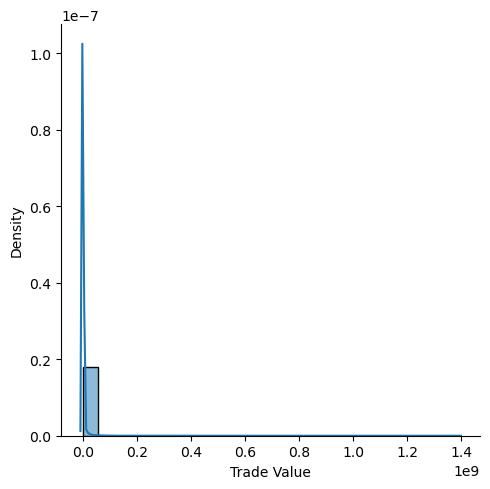

In [23]:
sns.displot(df['Trade Value'], bins = 25,kde=True,
    stat="density", kde_kws=dict(cut=3)
)


## 3. Data Prep

In [25]:
df_exports = df.groupby(['Year', 'Section'])['Trade Value'].sum().reset_index()
prep_df = df_exports.pivot_table(index='Year', columns=['Section'], values ='Trade Value', aggfunc='sum').fillna(0)
prep_df['Total Trade'] = prep_df.sum(axis=1)

In [26]:
prep_df

Section,Animal Hides,Animal Products,Animal and Vegetable Bi-Products,Arts and Antiques,Chemical Products,Foodstuffs,Footwear and Headwear,Instruments,Machines,Metals,...,Paper Goods,Plastics and Rubbers,Precious Metals,Stone And Glass,Textiles,Transportation,Vegetable Products,Weapons,Wood Products,Total Trade
Year,,,,,,,,,,,,,,,,,,,,,
2012,116632342.0,135418990.0,66038164.0,1659069.0,345872493.0,447239115.0,27663162.0,15527412.0,203615157.0,202661357.0,...,76292025.0,136594973.0,196967554.0,24945882.0,331517475.0,199439103.0,2.412271e+09,1527574.0,9086484.0,5.381065e+09
2013,112220685.0,124667792.0,125003582.0,1821453.0,480833483.0,570274584.0,60976270.0,28835662.0,217383840.0,337329436.0,...,119802494.0,213538397.0,240704637.0,38346548.0,413784164.0,104121311.0,2.417740e+09,1971933.0,41175258.0,6.252921e+09
2014,141457437.0,134873618.0,75124494.0,1882439.0,488328854.0,433851426.0,35779614.0,22739869.0,171520661.0,247101317.0,...,123108274.0,128582572.0,43025848.0,19064389.0,482539558.0,99389581.0,2.578199e+09,777.0,34674383.0,6.255925e+09
2015,82645361.0,111601846.0,82245616.0,1421631.0,461369577.0,582523916.0,52767745.0,28056349.0,197298739.0,274297532.0,...,127542336.0,180083105.0,31325260.0,23116691.0,470830248.0,106387914.0,2.577432e+09,583460.0,11092510.0,6.300151e+09
2016,73830856.0,101775906.0,112575979.0,1127653.0,410869328.0,514798349.0,45436252.0,20373711.0,250040870.0,261355606.0,...,124187584.0,154403192.0,23222474.0,17062528.0,456785423.0,148584078.0,2.616073e+09,129833.0,8218357.0,6.061766e+09
2017,104629787.0,115390523.0,99775544.0,1589063.0,412506607.0,523228057.0,43368941.0,17708399.0,147832657.0,262883483.0,...,122687409.0,140120205.0,33257811.0,21556487.0,438181916.0,77720265.0,2.882388e+09,194153.0,7172886.0,6.125540e+09
2018,90390572.0,151698807.0,123363162.0,2298086.0,477717341.0,539993544.0,43114233.0,26040724.0,248114707.0,259794215.0,...,153264586.0,128948592.0,90027435.0,28880423.0,525333504.0,98664402.0,2.957421e+09,13026.0,17715339.0,6.681927e+09
2019,41786437.0,137695181.0,143327208.0,1205974.0,454988369.0,518514081.0,51749147.0,24786871.0,248392625.0,278387861.0,...,114872051.0,121647274.0,364599114.0,28965974.0,473223399.0,114034212.0,2.625478e+09,26846.0,14605355.0,6.556288e+09
2020,26702023.0,129464027.0,196689174.0,1060881.0,479694147.0,595000746.0,51326916.0,23657599.0,159271824.0,278106842.0,...,126661664.0,125481971.0,434598276.0,28045724.0,454070290.0,61680460.0,2.778767e+09,373201.0,15943067.0,6.704910e+09


In [27]:
prep_df['Total Trade'].mean() #mean for Total Trade column

6448397494.272727

In [29]:
prep_df['Total Trade'].max()

7341762868.0

In [34]:
prep_df['Total Trade'].median()

6300150565.0

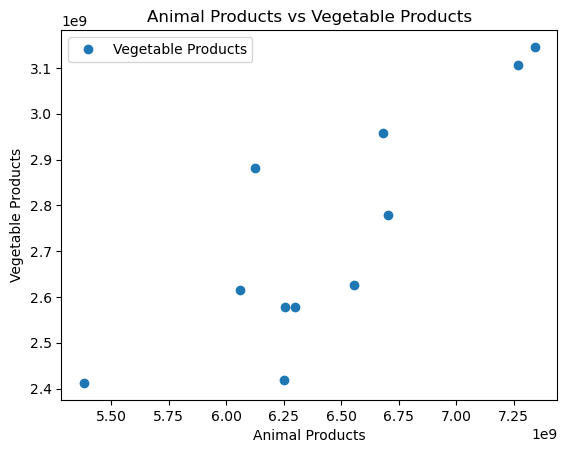

In [36]:
prep_df.plot(x = 'Total Trade', y = 'Vegetable Products',style='o')
plt.title('Animal Products vs Vegetable Products') #using Vegetable products due to it having the highest amount of trade across all years
plt.xlabel('Animal Products')
plt.ylabel('Vegetable Products')
plt.show()

In [37]:
X = prep_df['Total Trade'].values.reshape(-1,1)

In [40]:
y = prep_df['Vegetable Products'].values.reshape(-1,1)

In [42]:
X

array([[5.38106545e+09],
       [6.25292112e+09],
       [6.25592469e+09],
       [6.30015056e+09],
       [6.06176573e+09],
       [6.12554045e+09],
       [6.68192746e+09],
       [6.55628836e+09],
       [6.70490958e+09],
       [7.27011615e+09],
       [7.34176287e+09]])

In [44]:
y

array([[2.41227099e+09],
       [2.41774014e+09],
       [2.57819850e+09],
       [2.57743175e+09],
       [2.61607296e+09],
       [2.88238803e+09],
       [2.95742094e+09],
       [2.62547819e+09],
       [2.77876691e+09],
       [3.10655829e+09],
       [3.14577315e+09]])

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 3. Regression analysis

In [92]:
# Create a regression object.
regression = LinearRegression()

In [94]:
LinearRegression()

LinearRegression()

In [96]:
reg = LinearRegression()

In [98]:
reg.fit(X,y)

LinearRegression()

In [115]:
# Predict the values of y using X.
y_predicted = reg.predict(X_test)

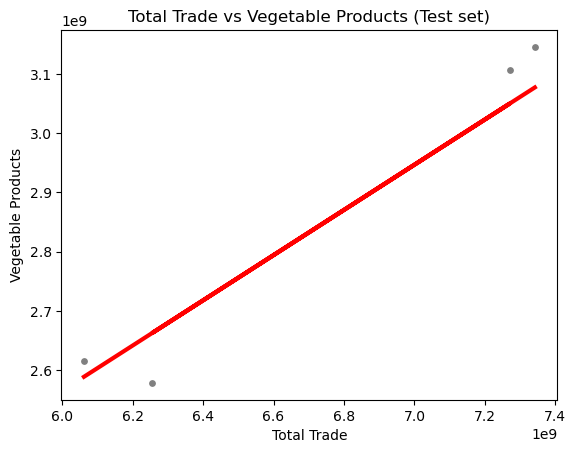

In [117]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Total Trade vs Vegetable Products (Test set)')
plot_test.xlabel('Total Trade')
plot_test.ylabel('Vegetable Products')
plot_test.show()

In [119]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [121]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,reg.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.38186675]]
Mean squared error:  3945372149189146.0
R2 score:  0.9439097515984597


In [123]:
y_predicted

array([[2.58854908e+09],
       [3.04997793e+09],
       [2.66269193e+09],
       [3.07733743e+09]])

In [129]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data

,Actual,Predicted
0,2.616073e+09,2.588549e+09
1,3.106558e+09,3.049978e+09
2,2.578199e+09,2.662692e+09
3,3.145773e+09,3.077337e+09
